In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from math import log
from CIoTS import *
import json
from time import time
import random

/usr/local/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
runs = 5
p_range = [5, 10, 15, 20] 
dimensions = 3
data_length = 10000
alpha = 0.05
in_edges_range = [2, 4]
auto_corr = 0.75
patience = 2*max(p_range)
p_max = 2*max(p_range)

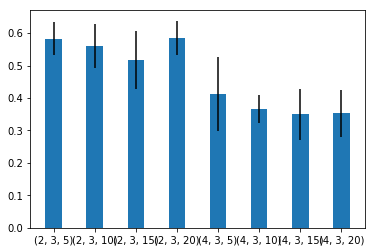

In [49]:
from collections import defaultdict

with open('results/edge_deletion_pc1.json', 'r') as f:
    results = json.load(f)

f1_scores = defaultdict(list)

for setting in results:
#     print(setting['in_edges'], setting['dim'], setting['p'])
    
    for experiment in setting['experiments']:
        true_graph = nx.from_dict_of_lists(experiment['true_graph'])
        pred_graph = nx.from_dict_of_lists(experiment['iterations'][setting['p']]['graph'], nx.DiGraph())
        pred_p = experiment['iterations'][setting['p']]['p_iter']
#         print(pred_p)
        measurements = evaluate_edges(true_graph, pred_graph)
        
#         print(measurements['f1-score'])
        f1_scores[(setting['in_edges'], setting['dim'], setting['p'])].append(measurements['f1-score'])
        
x = list(f1_scores.keys())

plt.bar(x=range(0, 2*len(x), 2), tick_label=list(map(str, x)), height=np.array([np.mean(f1_scores[k]) for k in x]), yerr=np.array([np.std(f1_scores[k]) for k in x]))
plt.show()

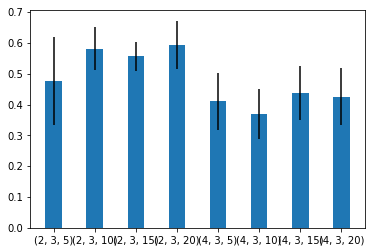

In [48]:
from collections import defaultdict

with open('results/edge_deletion_pc1_noniterative.json', 'r') as f:
    results = json.load(f)

f1_scores = defaultdict(list)

for setting in results:
#     print(setting['in_edges'], setting['dim'], setting['p'])
    
    for experiment in setting['experiments']:
        true_graph = nx.from_dict_of_lists(experiment['true_graph'])
        pred_graph = nx.from_dict_of_lists(experiment['iterations'][-1]['graph'], nx.DiGraph())
        pred_p = experiment['iterations'][-1]['p_iter']
#         print(pred_p)
#         print(setting['p'])
#         print('')
        measurements = evaluate_edges(true_graph, pred_graph)
        
#         print(measurements['f1-score'])
        f1_scores[(setting['in_edges'], setting['dim'], setting['p'])].append(measurements['f1-score'])
        
x = list(f1_scores.keys())

plt.bar(x=range(0, 2*len(x), 2), tick_label=list(map(str, x)), height=np.array([np.mean(f1_scores[k]) for k in x]), yerr=np.array([np.std(f1_scores[k]) for k in x]))
plt.show()